In [132]:
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import numpy as np

In [ ]:
engine = create_engine("sqlite:///resources")

In [2]:
############### used this code to loop through all the xpt files and convert them to csv on the bash terminal #########################

# for f in *.XPT; do python -m xport ${f} > ${f}.csv ; done;

In [3]:
#importing files

bp_file = pd.read_csv("resources/2015-2016/blood_pressure.csv")
body_measures_file = pd.read_csv("resources/2015-2016/body_measures.csv")
demo_file = pd.read_csv("resources/2015-2016/demographics.csv")
hdl_file = pd.read_csv("resources/2015-2016/lab_data/hdl_cholesterol.csv")
total_nutrient_intake_1_file = pd.read_csv("resources/2015-2016/total_nutrient_intake_day_1.csv")
total_nutrient_intake_2_file = pd.read_csv("resources/2015-2016/total_nutrient_intake_day_2.csv")
mental_health_file = pd.read_csv("resources/2015-2016/mental_health.csv")
income_file = pd.read_csv("resources/2015-2016/income.csv")

In [4]:
# lab data files




In [5]:
#creating dataframes

bp_df = pd.DataFrame(bp_file)
body_measures_df = pd.DataFrame(body_measures_file)
demo_df = pd.DataFrame(demo_file)
hdl_df = pd.DataFrame(hdl_file)
nutrient_intake_1_df = pd.DataFrame(total_nutrient_intake_1_file)
nutrient_intake_2_df = pd.DataFrame(total_nutrient_intake_2_file)
mental_health_df = pd.DataFrame(mental_health_file)
income_df = pd.DataFrame(income_file)

In [6]:
nutrient_intake_1_df.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,83732.0,92670.699919,69945.934107,1.0,71.0,2.0,2.0,-1.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
1,83733.0,16454.105994,13190.268870,1.0,61.0,2.0,2.0,17.0,7.0,1.0,...,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
2,83734.0,6529.619788,4928.422423,1.0,14.0,2.0,2.0,6.0,7.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0
3,83735.0,58191.539622,0.000000,1.0,22.0,2.0,1.0,15.0,6.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
4,83736.0,12358.085471,9813.677587,1.0,73.0,2.0,2.0,2.0,7.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
demo_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,...,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


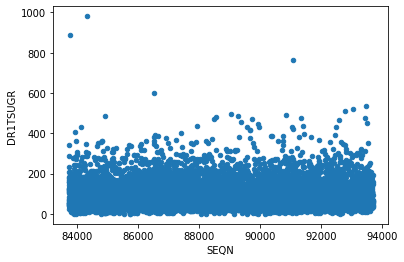

In [28]:
'''a rule of thumb on labelling in Britain and across the EU. That 90g equates to more than 22 small (4g) teaspoons of sugar'''

nutrient_intake_1_df.plot(kind='scatter', x='SEQN', y='DR1TSUGR')

In [96]:
##### Macronutrients to be selected days 1 and 2 ########
# Protein (DR1TPROT)
# carbs (DR1TCARB)
# total sugars (DR1TSUGR)
# dietary fibers (DR1TFIBE)
# total fat (DR1TTFAT)

In [120]:
nutrient_concat = nutrient_intake_1_df.merge(nutrient_intake_2_df, on='SEQN', how='inner')
demo_nutrition_df = nutrient_concat.merge(demo_df, on='SEQN', how='inner')
demo_nutrition_df = demo_nutrition_df[demo_nutrition_df['RIDAGEYR']>17][['SEQN', 'DMDEDUC2','DR1TKCAL','DR1TPROT','DR1TCARB','DR1TSUGR','DR1TFIBE','DR1TTFAT',\
                                                                         'DR2TKCAL','DR2TPROT','DR2TCARB','DR2TSUGR','DR2TFIBE','DR2TTFAT']].dropna()

In [105]:
demo_nutrition_df.to_csv('csv_files/demo_nutrition.csv')

In [163]:
demo_nutrition_df = demo_nutrition_df.dropna()
means = demo_nutrition_df.drop(columns=['SEQN','DMDEDUC2','DR1TKCAL','DR2TKCAL']).mean()

In [164]:
import plotly.express as px
import plotly.graph_objs as go

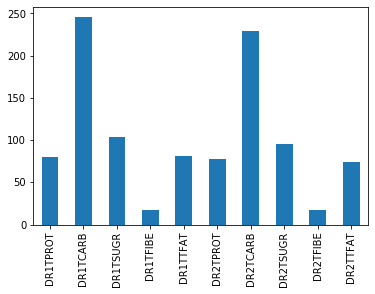

In [165]:
means.plot.bar()

In [166]:
demo_nutrition_df

,SEQN,DMDEDUC2,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR2TKCAL,DR2TPROT,DR2TCARB,DR2TSUGR,DR2TFIBE,DR2TTFAT
0,83732.0,5.0,1781.0,76.03,193.29,42.31,23.6,79.24,2744.0,133.60,281.64,118.40,15.9,121.59
1,83733.0,3.0,2964.0,62.36,356.85,180.84,7.3,77.91,3971.0,165.86,223.57,34.52,12.2,154.55
2,83734.0,3.0,2482.0,116.50,304.53,62.87,35.1,91.97,1928.0,93.78,194.17,94.51,17.4,90.14
4,83736.0,4.0,604.0,19.30,90.30,71.84,2.0,19.63,1102.0,31.29,131.83,73.63,3.1,50.88
5,83737.0,2.0,1304.0,79.02,153.43,22.31,16.1,43.08,663.0,26.80,100.77,23.99,11.9,19.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,93691.0,5.0,2149.0,42.08,346.27,67.39,16.7,65.74,1141.0,73.99,98.42,40.34,12.1,50.69
9536,93695.0,3.0,1531.0,44.09,144.83,64.07,7.2,87.47,1185.0,59.70,121.73,40.65,7.4,52.21
9537,93696.0,5.0,1897.0,65.38,225.69,40.70,15.0,82.23,2620.0,110.08,349.19,105.09,28.9,89.84
9538,93697.0,4.0,1540.0,74.52,166.72,52.88,16.9,60.05,1809.0,81.37,201.95,130.71,11.9,76.75
